<a href="https://colab.research.google.com/github/weso500/IOT-Anomaly-Detection/blob/main/Second_Level_Learner_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # for data analytics
import numpy as np # for numerical computation
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix # for evaluation
import itertools

style.use('ggplot')
np.random.seed(42)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Copyed from a kernel by joparga3 https://www.kaggle.com/joparga3/kernels
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
#dataset = pd.read_csv('/content/Mel_Spectro_Test.csv',na_filter=False)
#dataset = dataset.dropna()
dataset = pd.read_csv("/content/Total_combined_20_Anom.csv")
# apply normalization techniques
for column in dataset.columns:
    dataset[column] = dataset[column]  / dataset[column].abs().max()
dataset = dataset.fillna(0)
# view normalized data
display(dataset)
#dataset = dataset.loc[:, dataset.columns.intersection(['A+_IGBT-IMSE',	'A+_IGBT-IKL Loss', 	'A+_IGBT-IZmean1',	'A+_IGBT-IZmean2',	'A+_IGBT-IZmean3',	'A+_IGBT-IZlogvar1',	'A+_IGBT-IZlogvar2',	'A+_IGBT-IZlogvar3', 'Class'])]
#dataset = dataset.loc[:, dataset.columns.intersection(['A-FLUXMSE',	'A-FLUXKL Loss',	'A-FLUXZmean1',	'A-FLUXZmean2',	'A-FLUXZmean3',	'A-FLUXZlogvar1',	'A-FLUXZlogvar2',	'A-FLUXZlog', 'Class'])]
normal = dataset[dataset['Class'] == 0]

anomaly = dataset[dataset['Class'] == 1]
print(normal.shape)
print(anomaly.shape)

,A+_IGBT-IMSE,A+_IGBT-IKL Loss,A+_IGBT-IZmean1,A+_IGBT-IZmean2,A+_IGBT-IZmean3,A+_IGBT-IZlogvar1,A+_IGBT-IZlogvar2,A+_IGBT-IZlogvar3,A+IGBT-IMSE,A+IGBT-IKL Loss,...,MOD-IZlogvar3,MOD-VMSE,MOD-VKL Loss,MOD-VZmean1,MOD-VZmean2,MOD-VZmean3,MOD-VZlogvar1,MOD-VZlogvar2,MOD-VZlogvar3,Class
0,0.059266,0.526938,0.657051,-0.773250,-0.705008,-0.823051,-0.877036,-0.817427,0.024132,0.753636,...,-0.753069,0.002560,0.706342,0.587095,0.996779,-0.995779,-0.561812,-0.464924,-0.572959,0.0
1,0.061337,0.494514,0.631084,-0.590349,-0.819254,-0.978935,-0.984073,-0.735822,0.024318,0.742686,...,-0.535624,0.003829,0.678857,0.578123,0.978435,-0.964438,-0.568790,-0.458296,-0.563911,0.0
2,0.059276,0.526626,0.656750,-0.777760,-0.700137,-0.815049,-0.872162,-0.817597,0.024173,0.750557,...,-0.506767,0.002343,0.704430,0.585924,0.994037,-0.997196,-0.556479,-0.464290,-0.571464,0.0
3,0.058490,0.522777,0.651386,-0.771925,-0.703454,-0.823877,-0.873696,-0.812341,0.025421,0.734149,...,-0.512347,0.002080,0.701875,0.584916,0.993605,-0.993280,-0.559206,-0.463022,-0.571072,0.0
4,0.064957,0.489947,0.623321,-0.577585,-0.826148,-0.992870,-0.988430,-0.724765,0.024237,0.745475,...,-0.893066,0.002133,0.708149,0.587340,0.998612,-0.997915,-0.562257,-0.464875,-0.573647,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0.289265,0.357988,0.440145,-0.676231,-0.628221,-0.787374,-0.728516,-0.600799,0.218870,0.489500,...,-0.772417,0.020135,0.635589,0.588691,0.891090,-0.900604,-0.601247,-0.484088,-0.544099,1.0
706,0.062807,0.485115,0.620915,-0.581596,-0.816735,-0.977030,-0.979456,-0.724583,0.024362,0.757950,...,-0.534871,0.003705,0.702243,0.585559,0.996037,-0.989454,-0.565481,-0.462941,-0.572066,1.0
707,0.701662,0.324658,0.473977,-0.585535,-0.604393,-0.752834,-0.719524,-0.600638,0.483191,0.425490,...,-0.707563,0.561833,0.611755,0.820353,-0.250791,-0.126242,-0.729730,-0.715516,-0.577352,1.0
708,0.063923,0.480082,0.613137,-0.582031,-0.813933,-0.976550,-0.972018,-0.717916,0.024694,0.756369,...,-0.542132,0.002238,0.704689,0.586128,0.994446,-0.996858,-0.557245,-0.464326,-0.571703,1.0


(690, 113)
(20, 113)


In [ ]:
from sklearn.model_selection import train_test_split

train, normal_test, _, _ = train_test_split(normal, normal, test_size=.2, random_state=42)

normal_valid, normal_test, _, _ = train_test_split(normal_test, normal_test, test_size=.5, random_state=42)
anormal_valid, anormal_test, _, _ = train_test_split(anomaly, anomaly, test_size=.5, random_state=42)

train = train.reset_index(drop=True)
# Use pd.concat instead of append to combine DataFrames
valid = pd.concat([normal_valid, anormal_valid]).sample(frac=1).reset_index(drop=True)
test = pd.concat([normal_test, anormal_test]).sample(frac=1).reset_index(drop=True)

print('Train shape: ', train.shape)
print('Proportion os anomaly in training set: %.2f\n' % train['Class'].mean())
print('Valid shape: ', valid.shape)
print('Proportion os anomaly in validation set: %.2f\n' % valid['Class'].mean())
print('Test shape:, ', test.shape)
print('Proportion os anomaly in test set: %.2f\n' % test['Class'].mean())

Train shape:  (552, 113)
Proportion os anomaly in training set: 0.00

Valid shape:  (79, 113)
Proportion os anomaly in validation set: 0.13

Test shape:,  (79, 113)
Proportion os anomaly in test set: 0.13



In [ ]:
from scipy.stats import multivariate_normal

mu = train.drop('Class', axis=1).mean(axis=0).values
sigma = train.drop('Class', axis=1).cov().values
model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)

print(np.median(model.logpdf(valid[valid['Class'] == 0].drop('Class', axis=1).values)))
print(np.median(model.logpdf(valid[valid['Class'] == 1].drop('Class', axis=1).values)))

476.3191925932024
274.09070199370365


In [ ]:
tresholds = np.linspace(-1000,-10, 150)
scores = []
for treshold in tresholds:
    y_hat = (model.logpdf(valid.drop('Class', axis=1).values) < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                 precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.5208333333333334 0


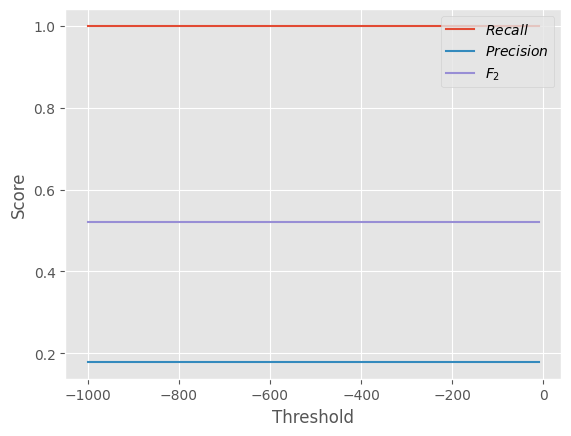

In [ ]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
# plt.xticks(np.logspace(-10, -200, 3))
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

Final threshold: -1000
Test Recall Score: 1.000
Test Precision Score: 0.179
Test F2 Score: 0.521


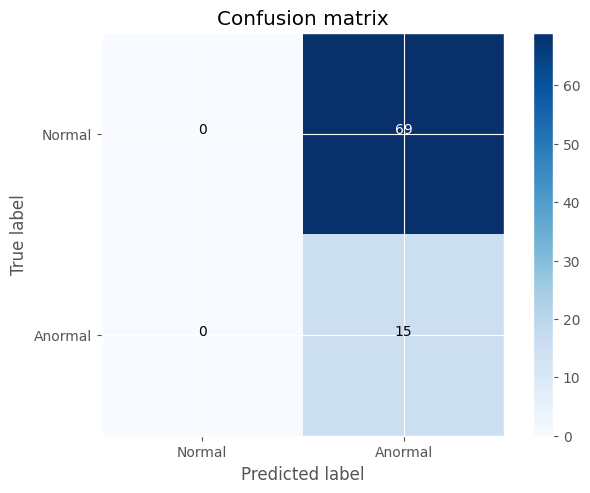

In [ ]:
final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (model.logpdf(test.drop('Class', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %d' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal']
                      , title='Confusion matrix')

<ipython-input-8-146ace6a9972>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature][dataset.Class == 1], bins=50, label='Anormal')
<ipython-input-8-146ace6a9972>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature][dataset.Class == 0], bins=50, label='Normal')


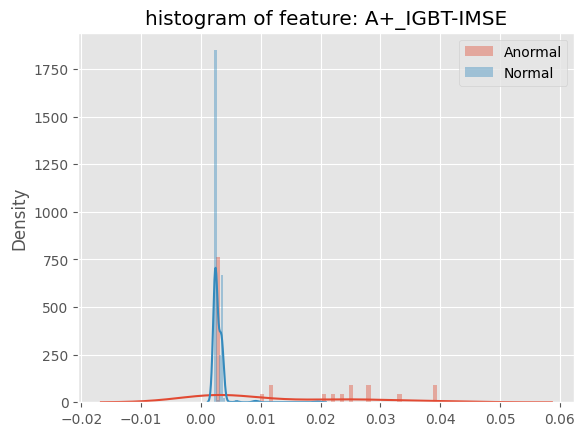

KeyError: 'A+_IGBT-IKL'

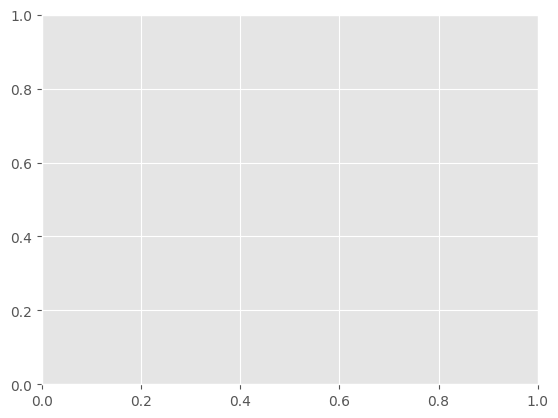

In [ ]:
import matplotlib.gridspec as gridspec

# plt.figure(figsize=(12,28*5))
# gs = gridspec.GridSpec(28, 1)
for feature in ['A+_IGBT-IMSE',	'A+_IGBT-IKL', 'Loss	A+_IGBT-IZmean1',	'A+_IGBT-IZmean2',	'A+_IGBT-IZmean3',	'A+_IGBT-IZlogvar1',	'A+_IGBT-IZlogvar2',	'A+_IGBT-IZlogvar3']:
    ax = plt.subplot()
    sns.distplot(dataset[feature][dataset.Class == 1], bins=50, label='Anormal')
    sns.distplot(dataset[feature][dataset.Class == 0], bins=50, label='Normal')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(feature))
    plt.legend(loc='best')
    plt.show()

In [ ]:
class hist_model(object):

    def __init__(self, bins=50):
        self.bins = bins

    def fit(self, X):

        bin_hight, bin_edge = [], []

        for var in X.T:
            # get bins hight and interval
            bh, bedge = np.histogram(var, bins=self.bins)
            bin_hight.append(bh)
            bin_edge.append(bedge)

        self.bin_hight = np.array(bin_hight)
        self.bin_edge = np.array(bin_edge)


    def predict(self, X):

        scores = []
        for obs in X:
            obs_score = []
            for i, var in enumerate(obs):
                # find wich bin obs is in
                bin_num = (var > self.bin_edge[i]).argmin()-1
                obs_score.append(self.bin_hight[i, bin_num]) # find bin hitght

            scores.append(np.mean(obs_score))

        return np.array(scores)



model = hist_model()
model.fit(train.drop('Class', axis=1).values)
print(np.median(model.predict(valid[valid['Class'] == 0].drop('Class', axis=1).values)))
print(np.median(model.predict(valid[valid['Class'] == 1].drop('Class', axis=1).values)))

42.107142857142854
36.330357142857146


In [ ]:
tresholds = np.linspace(10000, 80000, 100)
scores = []
y_pred_score = model.predict(valid.drop('Class', axis=1).values)
for treshold in tresholds:
    y_hat = (y_pred_score < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                 precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])

scores = np.array(scores)

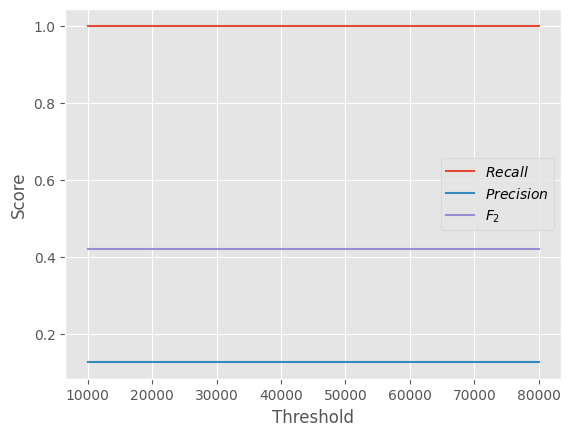

In [ ]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

Final threshold: 10000
Test Recall Score: 1.000
Test Precision Score: 0.179
Test F2 Score: 0.521


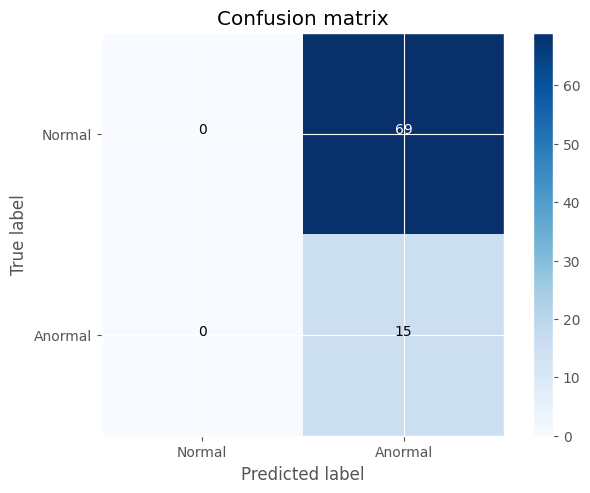

In [ ]:
final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (model.predict(test.drop('Class', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %d' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'], title='Confusion matrix')

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=4, random_state=42)
gmm.fit(train.drop('Class', axis=1).values)
print(gmm.score(valid[valid['Class'] == 0].drop('Class', axis=1).values))
print(gmm.score(valid[valid['Class'] == 1].drop('Class', axis=1).values))

209.00517848330358
-2187443.993027315


In [ ]:
tresholds = np.linspace(-400, 0, 100)
y_scores = gmm.score_samples(valid.drop('Class', axis=1).values)
scores = []
for treshold in tresholds:
    y_hat = (y_scores < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                 precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.5072463768115942 0


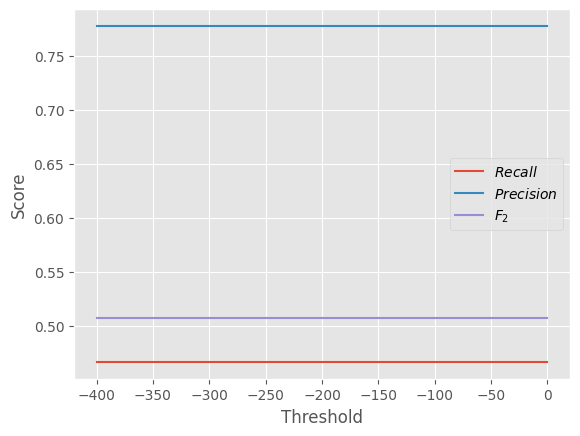

In [ ]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

Final threshold: -400.000000
Test Recall Score: 0.533
Test Precision Score: 0.889
Test F2 Score: 0.580


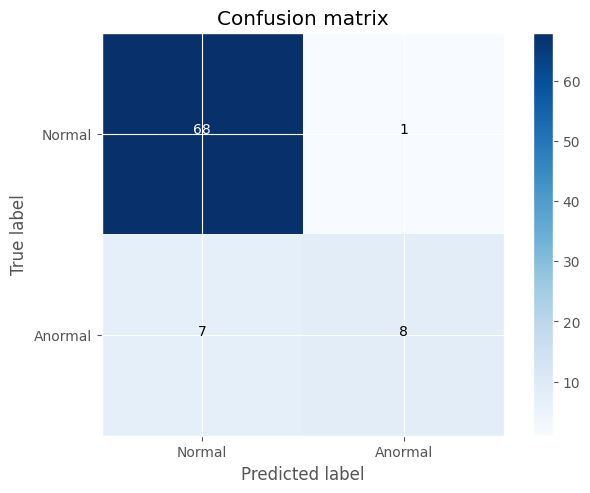

In [ ]:
final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (gmm.score_samples(test.drop('Class', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %f' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'], title='Confusion matrix')

In [ ]:
from sklearn.svm import OneClassSVM
np.random.seed(42)

model = OneClassSVM(gamma=0.000562, nu=.95, kernel='rbf')
model.fit(train.drop('Class', axis=1).values)
print(model.decision_function(valid[valid['Class'] == 0].drop('Class', axis=1).values).mean())
print(model.decision_function(valid[valid['Class'] == 1].drop('Class', axis=1).values).mean())

-66.2317545389124
-147.55349961468045


In [ ]:
tresholds = np.linspace(-50000, -400, 500)
y_scores = model.decision_function(valid.drop('Class', axis=1).values)
scores = []
for treshold in tresholds:
    y_hat = (y_scores < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                 precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

0.0 0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

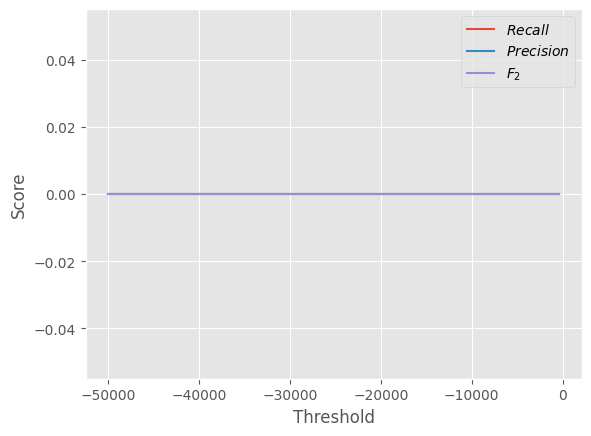

In [ ]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

In [ ]:
final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (model.decision_function(test.drop('Class', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %f' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

Final threshold: -50000.000000
Test Recall Score: 0.000
Test Precision Score: 0.000
Test F2 Score: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import IsolationForest
np.random.seed(42)

model = IsolationForest(random_state=42, n_jobs=4, max_samples=train.shape[0], bootstrap=True, n_estimators=50)
model.fit(train.drop('Class', axis=1).values)
print(model.decision_function(valid[valid['Class'] == 0].drop('Class', axis=1).values).mean())
print(model.decision_function(valid[valid['Class'] == 1].drop('Class', axis=1).values).mean())
print(model.decision_function(valid[valid['Class'] == 0].drop('Class', axis=1).values))
print(model.decision_function(valid[valid['Class'] == 1].drop('Class', axis=1).values))

0.04950455485737785
0.002417739507542153
[-0.06954521  0.03606158  0.09519949  0.03089149  0.08365329  0.04979951
 -0.0364913   0.07722601  0.07905248  0.099032    0.08781814  0.00521481
  0.10228683  0.10609049  0.06165114  0.038584    0.01658888  0.06267817
  0.00886218  0.06047648  0.11002386  0.04653602  0.04093234  0.08618387
  0.070116   -0.05404896  0.01638771  0.03530388  0.016011    0.07148611
  0.00696243  0.09297362  0.09685914  0.07746245  0.0073664   0.03656387
  0.09947822  0.06888583  0.05452927  0.0364521   0.02585564  0.09431588
  0.05894027  0.0623339   0.08107029  0.09676698  0.08551837  0.04826518
 -0.00169001  0.08250971  0.08522957 -0.01566747  0.05973852  0.04248017
  0.02002206  0.0770253   0.00897665  0.08538837  0.04046372  0.03989287
  0.07793106  0.03270446  0.01348236  0.05724446 -0.04471235  0.03745067
  0.05522017  0.03572547  0.06173641]
[-0.00520383  0.07576422  0.09403531  0.00231782 -0.1733473   0.06705076
  0.04965204  0.01303601  0.03729822  0.10940

In [ ]:
tresholds = np.linspace(-.2, .2, 200)
y_scores = model.decision_function(valid.drop('Class', axis=1).values)
scores = []
for treshold in tresholds:
    y_hat = (y_scores < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['Class'].values),
                 precision_score(y_pred=y_hat, y_true=valid['Class'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['Class'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.5371900826446281 138


In [ ]:
print(y_scores)

[-0.06954521  0.03606158  0.09519949  0.03089149  0.08365329  0.04979951
 -0.0364913   0.07722601  0.07905248  0.099032    0.08781814  0.00521481
  0.10228683  0.10609049  0.06165114  0.038584   -0.00520383  0.01658888
  0.06267817  0.00886218  0.06047648  0.11002386  0.04653602  0.04093234
  0.08618387  0.070116    0.07576422 -0.05404896  0.01638771  0.03530388
  0.016011    0.07148611  0.00696243  0.09297362  0.09685914  0.07746245
  0.09403531  0.0073664   0.03656387  0.09947822  0.06888583  0.05452927
  0.0364521   0.00231782  0.02585564 -0.1733473   0.09431588  0.05894027
  0.0623339   0.08107029  0.06705076  0.09676698  0.08551837  0.04826518
  0.04965204 -0.00169001  0.08250971  0.08522957 -0.01566747  0.05973852
  0.01303601  0.04248017  0.03729822  0.02002206  0.0770253   0.00897665
  0.10940117  0.08538837  0.05566662  0.04046372  0.03989287  0.07793106
  0.03270446  0.01348236  0.05724446 -0.04471235 -0.03088114  0.03745067
  0.05522017  0.0514227  -0.08230328  0.03572547 -0

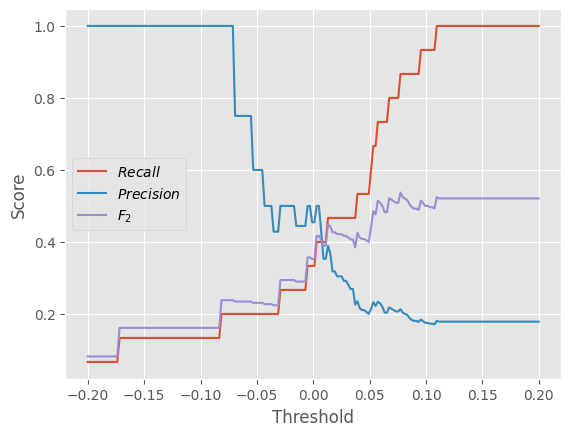

In [ ]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

Final threshold: 0.077387
Test Recall Score: 0.867
Test Precision Score: 0.206
Test F2 Score: 0.528


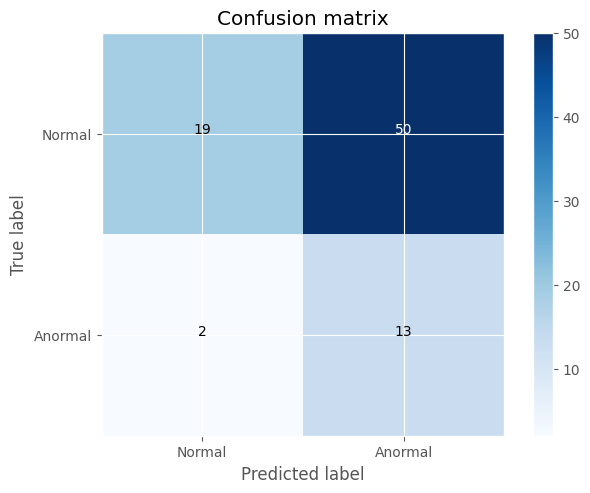

In [ ]:
final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (model.decision_function(test.drop('Class', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %f' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=2))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'], title='Confusion matrix')

[        inf  0.11002386  0.10940117  0.10609049  0.10228683  0.09685914
  0.09676698  0.08250971  0.08107029  0.07793106  0.07746245  0.06047648
  0.05973852  0.04248017  0.04093234  0.03745067  0.03656387  0.03530388
  0.03270446  0.02002206  0.016011    0.00696243  0.00521481 -0.05404896
 -0.06954521 -0.22764323]
0.4859903381642512


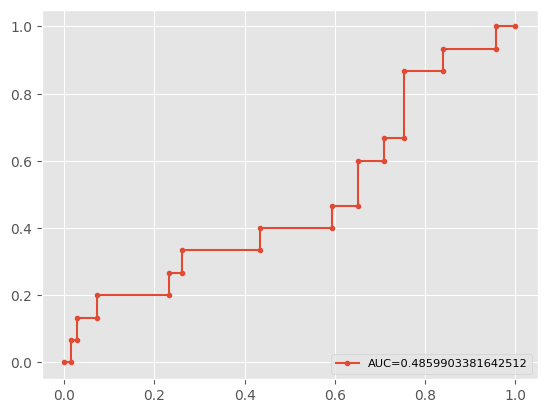

In [ ]:
y_test = pd.DataFrame(test, columns=['Class'])
y_pred = y_scores
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores , pos_label=1)
print(thresholds)
#pyplot.plot(fpr, tpr, marker='.', label='Logistic')
auc = metrics.auc(fpr, tpr)
print(auc)

#plt.figure(0).clf()
#fpr, tpr, _ = metrics.roc_curve(y_test, prediction_loss)
#auc = round(metrics.roc_auc_score(y_test, prediction_loss), 4)
plt.plot(fpr,tpr,marker='.',label="AUC="+str(auc))
plt.legend(loc='lower right', prop={'size': 8.2})

In [ ]:
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import LocalOutlierFactor
# fit the model for novelty detection (novelty=True)
clf1 = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.5)
clf1.fit(train.drop('Class', axis=1).values)
# DO NOT use predict, decision_function and score_samples on X_train as this
# would give wrong results but only on new unseen data (not used in X_train),
# e.g. X_test, X_outliers or the meshgrid
scores = clf1.score_samples(test.drop('Class', axis=1).values)
scores = abs(scores)

In [ ]:
pd.set_option('display.max_rows', None)
print(scores)
print(pd.DataFrame(test, columns=['Class']))

[28.04515303  1.04087092  1.19846253  1.14350512  1.02225048  0.98578897
  1.15961809  0.98435048  1.15948235  1.11407416  1.30174368  1.09343082
 31.83775955  1.198888    0.97907087  1.0116925   0.97755439  0.97053695
  1.19083116  1.11897344  0.98841848  1.31911388  0.99626412  1.10867542
  1.00655757  1.01746693  1.02190836  0.98458062  1.46580963  1.03199883
 22.87490036  1.13120416  1.11826149  1.390051    1.00350521 27.46458965
  1.210256    0.97210507  1.588538    1.10976444  0.97723929  1.00525935
  0.96369337  1.05618574  1.05217141  1.04137068  1.03764399  0.99795012
  3.96853145  0.98447641  1.02979466 40.42730956  1.03181671  1.07376507
  0.96614637  1.1079532   1.06351141  1.1782116   1.15483081 26.74909685
  1.01711067  1.30392918 28.73399414  1.00059799  1.00826523  1.08197591
  1.16404773  0.99604272  1.09692514  1.00740159  0.9821235   1.08838687
 41.11689908  1.06497698  1.04649788  1.06418123  1.1699156   1.0500605
  1.03793877  1.02663391  1.03343028  1.00173421  1.

[        inf 41.11689908 22.87490036  3.96853145  1.46580963  1.1699156
  1.16404773  1.10976444  1.10867542  1.09692514  1.09343082  0.98458062
  0.98447641  0.97210507  0.97053695  0.96369337]
0.8202898550724638


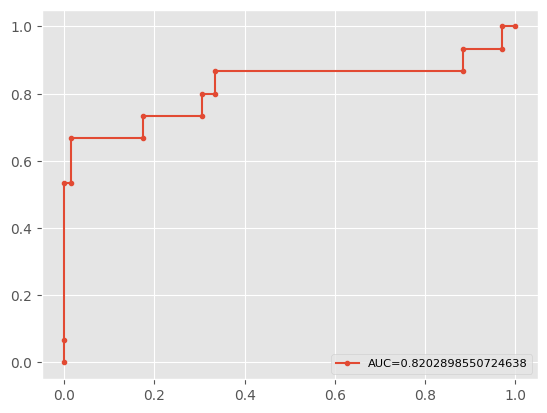

In [ ]:
y_test = pd.DataFrame(test, columns=['Class'])
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores , pos_label=1)
print(thresholds)
#pyplot.plot(fpr, tpr, marker='.', label='Logistic')
auc = metrics.auc(fpr, tpr)
print(auc)

#plt.figure(0).clf()
#fpr, tpr, _ = metrics.roc_curve(y_test, prediction_loss)
#auc = round(metrics.roc_auc_score(y_test, prediction_loss), 4)
plt.plot(fpr,tpr,marker='.',label="AUC="+str(auc))
plt.legend(loc='lower right', prop={'size': 8.2})

NameError: name 'mse_values_normal_plot' is not defined

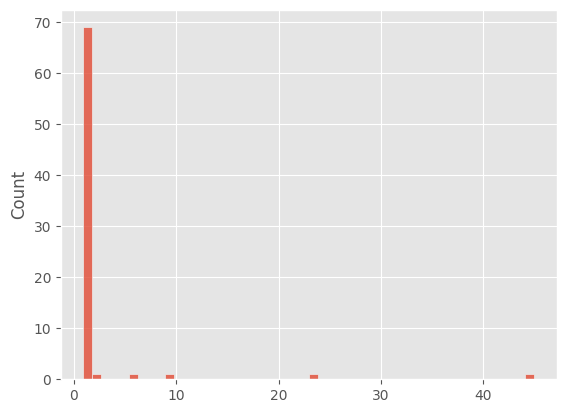

In [ ]:
sns.histplot(scores, bins=50, alpha=0.8)


sns.histplot(mse_values_normal_plot, bins=50, alpha=0.8, color='blue', label='Normal')
sns.histplot(mse_values_anomaly_plot, bins=50, alpha=0.8, color='red', label='Anomaly')
#plt.axvline(x=loss_threshold, color='orange')
#plt.xlim([0.0, 0.0003])
plt.legend()
plt.show()

In [31]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [32]:
# Fit a PCA model on the training data, to explain all the variance
train_pca = PCA(0.9999)
train_df_pca_transf = train_pca.fit_transform(train)

# Plot and examine how much each feature contribute to the total variance in the dataset.
exp_var_pca = pd.Series(train_pca.explained_variance_ratio_)
exp_var_pca.index += 1
print("Variance delta added for every new PC : \n")
print(pd.Series(exp_var_pca))
print()
print("Cummulative Variance after adding every new PC : \n")
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
print(cum_sum_eigenvalues)

Variance delta added for every new PC : 

1     0.553798
2     0.093974
3     0.069672
4     0.068511
5     0.052442
6     0.044947
7     0.036060
8     0.018473
9     0.012711
10    0.008370
11    0.007854
12    0.005973
13    0.005049
14    0.004053
15    0.002938
16    0.002109
17    0.001980
18    0.001406
19    0.001169
20    0.001145
21    0.000979
22    0.000832
23    0.000686
24    0.000617
25    0.000542
26    0.000500
27    0.000416
28    0.000365
29    0.000330
30    0.000284
31    0.000268
32    0.000226
33    0.000209
34    0.000142
35    0.000115
36    0.000090
37    0.000083
38    0.000080
39    0.000076
40    0.000059
41    0.000050
42    0.000047
43    0.000043
44    0.000041
45    0.000040
46    0.000033
47    0.000027
48    0.000023
49    0.000022
50    0.000020
51    0.000017
52    0.000013
dtype: float64

Cummulative Variance after adding every new PC : 

1     0.553798
2     0.647772
3     0.717444
4     0.785955
5     0.838396
6     0.883343
7     0.919403
8     

In [33]:
def df_mae_loss_score(originalDF, reconstDF):

    mae_err_matrix = np.abs((np.array(originalDF) - np.array(reconstDF)))
    row_loss = np.sum(mae_err_matrix, axis=1)
    col_loss = np.sum(mae_err_matrix, axis=0)
    return (row_loss)


def pca_train(train_sample_df, n_components):

    print("Original Shape : " + str(train_sample_df.shape))

    # PCA model
    train_pca = PCA(n_components)

    # Fit the PCA model on the training data and transform the same to get the reduced dimensioned data.
    train_df_pca_transf = train_pca.fit_transform(train_sample_df)
    # Reconstruct the original features from reduced dimensions.
    train_df_pca_reverse = train_pca.inverse_transform(train_df_pca_transf)
    return (train_df_pca_reverse, train_pca)

In [34]:
Example = pca_train(train, 5)

Original Shape : (552, 113)


In [35]:
print(df_mae_loss_score(train, Example[0]))
output = df_mae_loss_score(train, Example[0])
print(output.shape)

[4.3016913  2.86370814 3.54646813 4.77400731 2.2880708  1.29143581
 3.86284984 2.1958209  2.13457134 0.84341676 4.50983907 1.13132065
 3.7796263  3.69611143 1.10520459 3.40678584 2.8368116  1.97183852
 2.42293107 2.7747492  2.54930158 3.54245837 1.78928154 2.20314012
 2.53874943 2.16707429 3.00684386 2.80797919 2.07178136 2.19799712
 2.32814482 4.37756456 0.81558769 2.39048246 2.73238122 0.78561587
 2.6235633  3.0281612  1.24610998 4.51260851 1.9185206  3.51367868
 2.68253006 3.47984068 3.32098364 1.01840001 3.47245295 2.60889668
 3.15481127 2.89865105 3.69173084 0.99204346 2.03874394 0.92769465
 2.35412597 1.230986   2.09619105 3.15383669 3.06232085 3.02918225
 3.48755024 1.98616821 3.2112863  2.73742165 1.64808968 4.40023349
 2.48862508 0.92584423 1.41672841 3.31563231 1.84547964 4.55518502
 0.81971778 4.9616225  1.99777647 3.64381581 3.16493844 1.01344536
 2.91619794 4.28540438 4.21109789 2.44948993 2.67255222 2.81354503
 3.41685326 2.21427569 2.80091116 0.94061926 3.10249809 1.8385

In [36]:
test_df_pca_transf = train_pca.transform(test)
test_df_pca_reverse = train_pca.inverse_transform(test_df_pca_transf)

In [37]:
output1 = df_mae_loss_score(test, test_df_pca_reverse)
print(output1.shape)

(79,)


In [38]:
print(output1)

[ 0.07894408  0.06578329  1.09445215  0.10367638  0.1277839   0.06335124
  0.06578856  0.11573191  0.0698248   0.05820423  0.05676403  0.08878981
  0.09516778  0.09593673  0.07813039  0.09670062  0.0951614   0.09435275
  0.07320344  0.07894343  1.10430655  0.07374886  0.11112502  0.06887377
  0.09118358  1.06831426  0.06037897  0.08800628  0.07198406  0.08292644
  0.05788092  0.06139384  0.06271156  0.1036617  11.47105393  0.08468025
  0.06890553  0.07603767  0.07208698  3.68287122  0.06596953  0.05377433
  0.08274133  0.09742486  0.06739567  1.05326289  0.06321658  0.06076693
  0.06830036  0.10174074  0.05457561  0.07523259  0.06534453  0.05943118
  3.13858871  0.07229282  0.07818806  1.06827103  0.08325841  0.06912211
  0.09441602  0.07109399  0.06765451  0.07651435  0.08481802  0.09877903
 13.84473323  0.14301202  0.10621819  0.08798739  0.07637649  0.06066356
  8.92697275  0.09906873  0.07408208  0.06868458  0.05110391  0.10007264
  0.06692253]


[        inf 13.84473323  1.05326289  0.05110391]
1.0


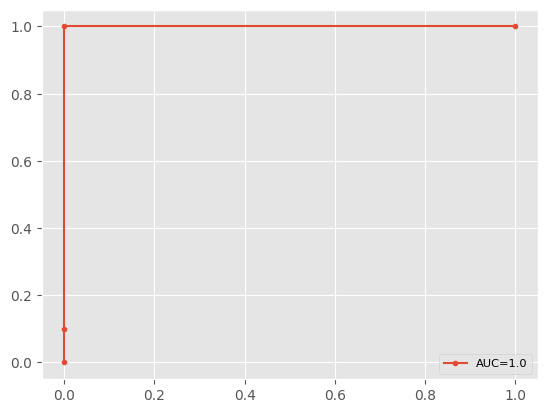

In [39]:
y_test = pd.DataFrame(test, columns=['Class'])
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, thresholds = metrics.roc_curve(y_test, output1 , pos_label=1)
print(thresholds)
#pyplot.plot(fpr, tpr, marker='.', label='Logistic')
auc = metrics.auc(fpr, tpr)
print(auc)

#plt.figure(0).clf()
#fpr, tpr, _ = metrics.roc_curve(y_test, prediction_loss)
#auc = round(metrics.roc_auc_score(y_test, prediction_loss), 4)
plt.plot(fpr,tpr,marker='.',label="AUC="+str(auc))
plt.legend(loc='lower right', prop={'size': 8.2})